In [1]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read csv file
movie_data = pd.read_csv('movie_ratings.csv')
movie_data

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Gladiator,2000,8.5,67.0,1187559
1,1,Memento,2000,8.5,80.0,1014199
2,2,Snatch,2000,8.3,NaN,707162
3,3,Requiem for a Dream,2000,8.3,68.0,688394
4,4,X-Men,2000,7.4,64.0,526411
...,...,...,...,...,...,...
1795,1795,Transformers: The Last Knight,2017,5.2,NaN,113918
1796,1796,Mindhunter,2017,8.5,NaN,111213
1797,1797,The Lego Batman Movie,2017,7.3,75.0,111193
1798,1798,The Handmaid's Tale,2017,8.6,NaN,106329


In [27]:
# Calculate All Major Moments for each numerical column
def calculate_moments(df, columns):
    moments = {}
    for col in columns:
        moments[col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        }
    return pd.DataFrame(moments)
# Specify columns for which to calculate moments
numeric_columns = ['imdb', 'metascore', 'votes']
moments_df = calculate_moments(movie_data, numeric_columns)

# Display major moments for each column
print("Major Moments for IMDb, Metascore, and Votes:")
print(moments_df)


Major Moments for IMDb, Metascore, and Votes:
                        imdb  metascore          votes
Mean                7.239444  74.280000  317636.275556
Median              7.300000  74.280000  246739.000000
Standard Deviation  0.818280   6.584277  215133.337323
Skewness           -0.183860   0.744826       2.741227
Kurtosis            0.309101   1.727550      11.521031


In [24]:
# data cleaning and data preprocessing
def preprocess_data(data):
    """
    Preprocess the dataset by cleaning, handling missing values, and removing outliers.
    
    Args:
    data (DataFrame): The original DataFrame.

    Returns:
    DataFrame: Cleaned DataFrame.
    """
    # Remove unnecessary columns
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])

    
    # Convert columns to appropriate data types
    data['year'] = data['year'].astype(int)
    data['votes'] = data['votes'].astype(int)

    # Remove or cap outliers in 'votes' and 'imdb' using quantile thresholds
    def remove_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
        lower_bound = df[column].quantile(lower_quantile)
        upper_bound = df[column].quantile(upper_quantile)
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    data = remove_outliers(data, 'votes')
    data = remove_outliers(data, 'imdb')

    

In [6]:
#fill na values with mean value
movie_data['metascore'].fillna(movie_data['metascore'].mean(), inplace=True)

In [19]:
# info about the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      1800 non-null   object 
 1   year       1800 non-null   int64  
 2   imdb       1800 non-null   float64
 3   metascore  1800 non-null   float64
 4   votes      1800 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 70.4+ KB


In [7]:
# display descriptive statistics
movie_description = movie_data.describe()
print("Descriptive Statistics:")
print(movie_description)


Descriptive Statistics:
              year         imdb    metascore         votes
count  1800.000000  1800.000000  1800.000000  1.800000e+03
mean   2008.495556     7.239444    74.280000  3.176363e+05
std       5.183780     0.818280     6.584277  2.151333e+05
min    2000.000000     4.100000    61.000000  9.342800e+04
25%    2004.000000     6.700000    72.000000  1.842225e+05
50%    2008.500000     7.300000    74.280000  2.467390e+05
75%    2013.000000     7.800000    74.280000  3.825830e+05
max    2017.000000     9.900000   100.000000  2.020298e+06


In [25]:
# correlation of data
numeric_columns = movie_data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only
movie_correlation = numeric_columns.corr()
print("\nCorrelation Matrix:")
print(movie_correlation)



Correlation Matrix:
               year      imdb  metascore     votes
year       1.000000  0.021703   0.027050  0.047902
imdb       0.021703  1.000000   0.225198  0.434903
metascore  0.027050  0.225198   1.000000  0.153371
votes      0.047902  0.434903   0.153371  1.000000


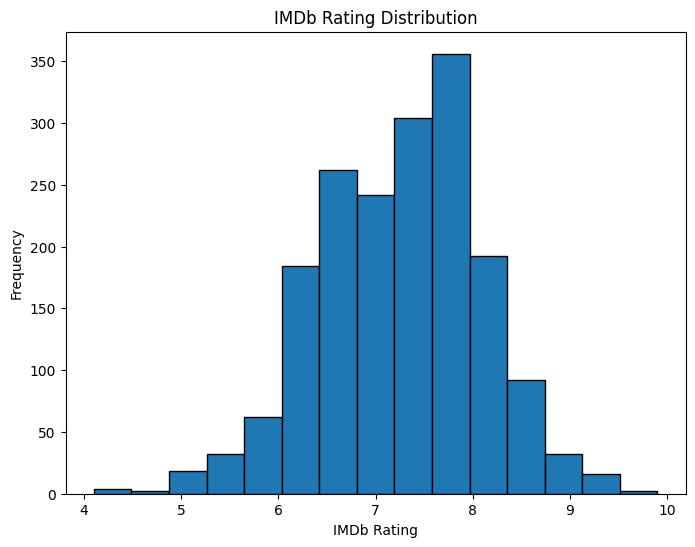

In [26]:
# Plot 1: Histogram of IMDb Ratings
def plot_imdb_histogram(data):
    """
    Plot histogram of IMDb Ratings.

    Args:
    data (DataFrame): Data to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data['imdb'], bins=15, edgecolor='black')
    plt.title('IMDb Rating Distribution')
    plt.xlabel('IMDb Rating')
    plt.ylabel('Frequency')
    plt.show()
plot_imdb_histogram(movie_data)

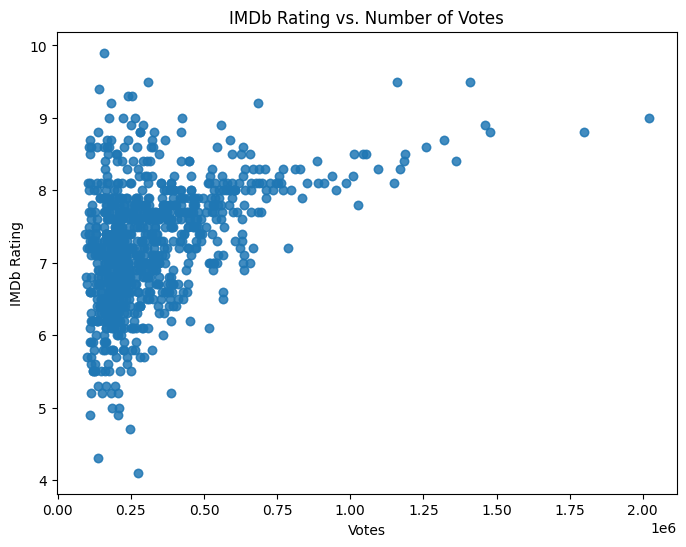

In [17]:
# Plot 2: Scatter plot of IMDb Rating vs Votes
def plot_imdb_vs_votes(data):
    """
    Plot scatter plot of IMDb Rating vs. Number of Votes.

    Args:
    data (DataFrame): Data to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data['votes'], data['imdb'], alpha=0.6)
    plt.title('IMDb Rating vs. Number of Votes')
    plt.xlabel('Votes')
    plt.ylabel('IMDb Rating')
    plt.show()
plot_imdb_vs_votes(movie_data)

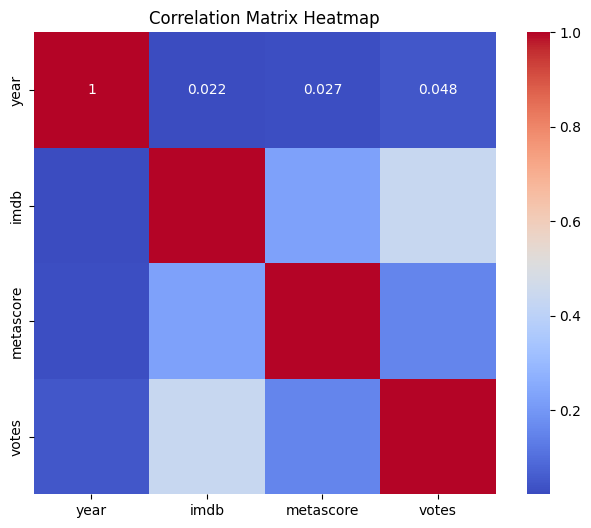

In [18]:
# Plot 3: Heatmap of the correlation matrix
def plot_correlation_heatmap(data):
    """
    Plot heatmap of the correlation matrix.

    Args:
    data (DataFrame): Numeric data to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()
plot_correlation_heatmap(numeric_columns)